# Demo: 2D Poisson solver with pure dirichlet boundary conditions.

Reference:
  - https://farside.ph.utexas.edu/teaching/329/lectures/node71.html

Problem description:

$$
\nabla^2 \Phi = f
$$
where,
  - $f = 6xy(1-y) - 2x^3$
  - Domain: $[0, 1] \times [0, 1]$
  - At the boundary:
    - $\Phi(0, y) = 0$
    - $\Phi(1, y) = y(1-y)$
    - $\Phi(x, 0) = 0$
    - $\Phi(x, 1) = 0$

From the above conditions, the exact solution becomes

$$
\Phi(x, y) = y(1-y)x^3
$$

In [3]:
from pyapes.core.geometry import Box
from pyapes.core.mesh import Mesh
from pyapes.core.solver.fdm import FDM
from pyapes.core.solver.ops import Solver
from pyapes.core.variables import Field
from pyapes.testing.poisson import poisson_bcs, poisson_rhs_nd, poisson_exact_nd

# Construct mesh with nx = 100
mesh = Mesh(Box[0:1, 0:1], None, [100, 100])

f_bc = poisson_bcs(2)  # BC config

# Target variable
var = Field("p", 1, mesh, {"domain": f_bc, "obstacle": None})

# Set RHS
rhs = poisson_rhs_nd(mesh, var)  # RHS

# Exact solution
sol_ex = poisson_exact_nd(mesh)  # exact solution


Now, we'd like to solve the given system using the iterative conjugate gradient solver.

In [5]:
# Configure solver
solver = Solver(
    {
        "fdm": {
            "method": "cg",
            "tol": 1e-6,
            "max_it": 1000,
            "report": True,
        }
    }
)

`pyapes` package allows user to use human-readable OpenFOAM like notations to set the partial differential equation (PDE) using `FDM` module.


CG: The solution  converged after 210 iteration.
	tolerance: 9.661285603057063e-07


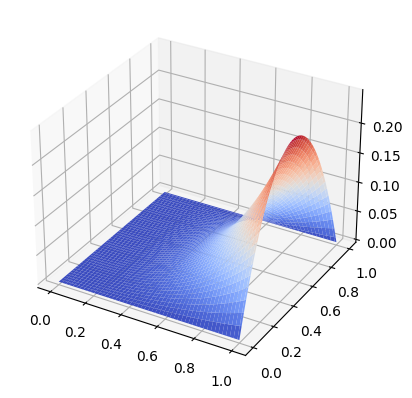

In [6]:
fdm = FDM() # FDM discretizer

# Construct equation and solve the given PDE
solver.set_eq(fdm.laplacian(1.0, var) == rhs)
solver.solve()

# Plot the solution
import matplotlib.pyplot as plt
from matplotlib import cm

_, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(mesh.X, mesh.Y, var()[0], cmap=cm.coolwarm)
plt.show()